In [59]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
class TicTacToe:
    def __init__(self):
        self.player, self.opponent = 'o', 'x'

    def printboard(self,board):
        print(' {} | {} | {}'.format(board[0][0], board[0][1], board[0][2]))
        print('---+---+---')
        print(' {} | {} | {}'.format(board[1][0], board[1][1], board[1][2]))
        print('---+---+---')
        print(' {} | {} | {}'.format(board[2][0], board[2][1], board[2][2]))
        print('\n')
    
    def isMovesLeft(self,board) :
        for i in range(3) :
            for j in range(3) :
                if (board[i][j] == '_') :
                    return True
        return False
    
    def check_winner(self, board):
        for row in board:
            if row[0] != '_' and row[0] == row[1] == row[2]:
                return row[0]

        for col in range(3):
            if board[0][col] != '_' and board[0][col] == board[1][col] == board[2][col]:
                return board[0][col]

        if board[0][0] != '_' and board[0][0] == board[1][1] == board[2][2]:
            return board[0][0]
        if board[0][2] != '_' and board[0][2] == board[1][1] == board[2][0]:
            return board[0][2]

        return None

    
    def evaluate(self,b) :
        for row in range(3) :
            if (b[row][0] == b[row][1] and b[row][1] == b[row][2]) :
                if (b[row][0] == self.player) :
                    return 10
                elif (b[row][0] == self.opponent) :
                    return -10

        for col in range(3) :
            if (b[0][col] == b[1][col] and b[1][col] == b[2][col]) :
                if (b[0][col] == self.player) :
                    return 10
                elif (b[0][col] == self.opponent) :
                    return -10
                
        if (b[0][0] == b[1][1] and b[1][1] == b[2][2]) :
            if (b[0][0] == self.player) :
                return 10
            elif (b[0][0] == self.opponent) :
                return -10

        if (b[0][2] == b[1][1] and b[1][1] == b[2][0]) :
            if (b[0][2] == self.player) :
                return 10
            elif (b[0][2] == self.opponent) :
                return -10

        return 0
    
    def minimax(self, board, depth, alpha, beta, isMax, isPrun) :
        score = self.evaluate(board)
        if (score == 10) :
            return score

        if (score == -10) :
            return score

        if (self.isMovesLeft(board) == False) :
            return 0
        
        if depth==0:
            return 0
        

        if (isMax) :
            best = -1000
            for i in range(3) :
                for j in range(3) :
                    if (board[i][j]=='_') :
                        board[i][j] = self.player
                        best = max( best, self.minimax(board,depth - 1, alpha, beta, not isMax, isPrun))
                        board[i][j] = '_'
                        if not isPrun:
                            alpha = max(alpha, best)
                            if beta <= alpha:
                                break
            return best
        
        else :
            best = 1000
            for i in range(3) :
                for j in range(3) :

                    if (board[i][j] == '_') :
                        board[i][j] = self.opponent
                        best = min(best, self.minimax(board, depth - 1, alpha, beta, not isMax, isPrun))
                        board[i][j] = '_'
                        if not isPrun:
                            alpha = max(alpha, best)
                            if beta <= alpha:
                                break
                        
            return best
        
    def get_best_move(self, board, depth, isPrun):
        bestVal = -1000
        bestMove = (-1, -1)
        alpha = -1000
        beta = 1000
        for i in range(3) :
            for j in range(3) :
                if (board[i][j] == '_') :
                    board[i][j] = self.player
                    moveVal = self.minimax(board, depth-1, alpha, beta, False, isPrun)
                    board[i][j] = '_'
                    if (moveVal > bestVal) :
                        bestMove = (i, j)
                        bestVal = moveVal
                    if not isPrun:
                        alpha = max(alpha, bestVal)
                        if beta <= alpha:
                            break

        return bestMove

In [3]:
winning_combinations = [
    [(0, 0), (0, 1), (0, 2)],  
    [(1, 0), (1, 1), (1, 2)],  
    [(2, 0), (2, 1), (2, 2)],  
    [(0, 0), (1, 0), (2, 0)], 
    [(0, 1), (1, 1), (2, 1)],  
    [(0, 2), (1, 2), (2, 2)], 
    [(0, 0), (1, 1), (2, 2)],  
    [(0, 2), (1, 1), (2, 0)]   
]

def get_computer_move(board):
    for combination in winning_combinations:
        values = [board[row][col] for row, col in combination]
        if values.count('o') == 2 and values.count('_') == 1:
            for row, col in combination:
                if board[row][col] == '_':
                    return row, col
    
    for combination in winning_combinations:
        values = [board[row][col] for row, col in combination]
        if values.count('x') == 2 and values.count('_') == 1:
            for row, col in combination:
                if board[row][col] == '_':
                    return row, col
    
    while True:
        row = random.randint(0, 2)
        col = random.randint(0, 2)
        if board[row][col] == '_':
            return row, col


In [ ]:
game = TicTacToe()
board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]

i = 0
depth = 0
isPrun = True

moves_array = []

while not game.check_winner(board):
    if i%2==0:
        while True:
            move = int(input('\nEnter your move (0-8): '))
            a = move//3
            b = move%3
            
            if (a,b) not in moves_array:
                break
            else:
                print('\nInvalid Move')
            
        print('\n')
        r = move//3
        c = move%3
        moves_array.append((r,c))
        board[r][c] = 'x'
    else:
        
        
        st = time.time()
        best_move = game.get_best_move(board,depth,isPrun)
        board[best_move[0]][best_move[1]] = 'o'
        moves_array.append((best_move[0],best_move[1]))
        if best_move[0]==-1:
            break
        
#         print(best_move)
        print('Computer is thinking...')

        et = time.time()
        print("\n")
        print("Time taken : ",et-st)
        print("\n")
        
    game.printboard(board)
    i = i + 1
  



    
if len(moves_array)==10:
    print('Its a Tie')

else:
    if game.check_winner(board) == 'o':
        print('Computer Wins')
    else:
        print('User Wins')


# Depth = 8, Computer First

In [4]:
wins_smart_random_8c = []
wins_computer_8c = []
ties_8c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 8
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------')
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_8c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_8c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_8c.append(1)


In [5]:
print(len(ties_8c))
print(len(wins_computer_8c))
print(len(wins_smart_random_8c))

280
720
0


# Depth = 8, Smart First

In [6]:
wins_smart_random_8s = []
wins_computer_8s = []
ties_8s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 70
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_8s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_8s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_8s.append(1)


In [7]:
print(len(ties_8s))
print(len(wins_computer_8s))
print(len(wins_smart_random_8s))

812
188
0


# Depth = 7, Computer First

In [8]:
wins_smart_random_7c = []
wins_computer_7c = []
ties_7c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 7
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_7c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_7c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_7c.append(1)


In [9]:
print(len(ties_7c))
print(len(wins_computer_7c))
print(len(wins_smart_random_7c))

272
728
0


# Depth = 7, Smart First

In [10]:
wins_smart_random_7s = []
wins_computer_7s = []
ties_7s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 7
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_7s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_7s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_7s.append(1)


In [11]:
print(len(ties_7s))
print(len(wins_computer_7s))
print(len(wins_smart_random_7s))

818
182
0


# Depth = 6, Computer First

In [12]:
wins_smart_random_6c = []
wins_computer_6c = []
ties_6c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 6
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_6c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_6c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_6c.append(1)


In [13]:
print(len(ties_6c))
print(len(wins_computer_6c))
print(len(wins_smart_random_6c))

274
726
0


# Depth = 6, Smart First

In [14]:
wins_smart_random_6s = []
wins_computer_6s = []
ties_6s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 6
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_6s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_6s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_6s.append(1)


In [15]:
print(len(ties_6s))
print(len(wins_computer_6s))
print(len(wins_smart_random_6s))

812
188
0


# Depth = 5, Computer First

In [16]:
wins_smart_random_5c = []
wins_computer_5c = []
ties_5c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 5
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)




    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_5c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_5c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_5c.append(1)


In [17]:
print(len(ties_5c))
print(len(wins_computer_5c))
print(len(wins_smart_random_5c))

263
720
17


# Depth = 5, Smart First

In [18]:
wins_smart_random_5s = []
wins_computer_5s = []
ties_5s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 5
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_5s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_5s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_5s.append(1)


In [19]:
print(len(ties_5s))
print(len(wins_computer_5s))
print(len(wins_smart_random_5s))

464
277
259


# Depth = 4, Computer First

In [20]:
wins_smart_random_4c = []
wins_computer_4c = []
ties_4c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 4
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_4c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_4c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_4c.append(1)


In [21]:
print(len(ties_4c))
print(len(wins_computer_4c))
print(len(wins_smart_random_4c))

397
483
120


# Depth = 4, Smart First

In [22]:
wins_smart_random_4s = []
wins_computer_4s = []
ties_4s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 4
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_4s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_4s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_4s.append(1)


In [23]:
print(len(ties_4s))
print(len(wins_computer_4s))
print(len(wins_smart_random_4s))

588
204
208


# Depth = 3, Computer First

In [24]:
wins_smart_random_3c = []
wins_computer_3c = []
ties_3c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 3
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_3c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_3c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_3c.append(1)


In [25]:
print(len(ties_3c))
print(len(wins_computer_3c))
print(len(wins_smart_random_3c))

361
483
156


# Depth = 3, Smart First

In [26]:
wins_smart_random_3s = []
wins_computer_3s = []
ties_3s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 3
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_3s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_3s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_3s.append(1)


In [27]:
print(len(ties_3s))
print(len(wins_computer_3s))
print(len(wins_smart_random_3s))

486
276
238


# Depth = 2, Computer First

In [28]:
wins_smart_random_2c = []
wins_computer_2c = []
ties_2c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 2
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_2c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_2c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_2c.append(1)


In [29]:
print(len(ties_2c))
print(len(wins_computer_2c))
print(len(wins_smart_random_2c))

504
295
201


# Depth = 2, Smart First

In [30]:
wins_smart_random_2s = []
wins_computer_2s = []
ties_2s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 2
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_2s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_2s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_2s.append(1)


In [31]:
print(len(ties_2s))
print(len(wins_computer_2s))
print(len(wins_smart_random_2s))

576
211
213


# Depth = 0, Computer First

In [32]:
wins_smart_random_0c = []
wins_computer_0c = []
ties_0c = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 0
    depth = 1
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_0c.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_0c.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_0c.append(1)


In [33]:
print(len(ties_0c))
print(len(wins_computer_0c))
print(len(wins_smart_random_0c))

145
93
762


# Depth = 0, Smart First

In [34]:
wins_smart_random_0s = []
wins_computer_0s = []
ties_0s = []

game = TicTacToe()


for itera in range(1000):
    
    board = [
    [ '_', '_', '_' ],
    [ '_', '_', '_' ],
    [ '_', '_', '_' ]
]
    
    i = 1
    depth = 1
    isPrun = True

    moves_array = []

    first_try = True


    if i==0:
        game.player = 'x'
        game.opponent = 'o'

#     if i==0:
#         print('Computer Move')
#     else:
#         print('Smart Random')

    random_index = random.randint(0,8)
    r = random_index%3
    c = random_index//3
    if i==1:
        board[r][c] = game.opponent
    else:
        board[r][c] = game.player

#     game.printboard(board)


    while not game.check_winner(board):


        if i%2==0:
#             print('Smart Random')
            if len(moves_array)>=8:
                break
            move_i, move_j = get_computer_move(board)
            moves_array.append((move_i,move_j))
            board[move_i][move_j] = game.opponent



        else:
#             print('Computer Move')
            best_move = game.get_best_move(board, depth, isPrun)
            board[best_move[0]][best_move[1]] = game.player
            moves_array.append((best_move[0],best_move[1]))

            if best_move[0]==-1:
                break



#         game.printboard(board)
        i = i + 1




        
    
#     print('----------------------------',itera)
    
    if len(moves_array)>=8:
#         print('Its a Tie')
        ties_0s.append(1)

    else:
        if game.check_winner(board) == game.player:
#             print('Computer Wins')
            wins_computer_0s.append(1)
        else:
#             print('Smart Random Wins')
            wins_smart_random_0s.append(1)


In [35]:
print(len(ties_0s))
print(len(wins_computer_0s))
print(len(wins_smart_random_0s))

195
142
663


In [75]:
all_depth_data_ties_c = [len(ties_8c), len(ties_7c), len(ties_6c), len(ties_5c), len(ties_4c), 
                         len(ties_3c), len(ties_2c), len(ties_0c)]


all_depth_data_wins_minmax_c = [len(wins_computer_8c), len(wins_computer_7c), len(wins_computer_6c), 
                                len(wins_computer_5c),
                                len(wins_computer_4c), len(wins_computer_3c), 
                                len(wins_computer_2c), len(wins_computer_0c)]


all_depth_data_wins_smart_c = [len(wins_smart_random_8c), len(wins_smart_random_7c), len(wins_smart_random_6c), 
                               len(wins_smart_random_5c), len(wins_smart_random_4c), len(wins_smart_random_3c), 
                               len(wins_smart_random_2c), len(wins_smart_random_0c)]



In [76]:
all_depth_data_ties_s = [len(ties_8s), len(ties_7s), len(ties_6s), len(ties_5s), len(ties_4s), 
                         len(ties_3s), len(ties_2s), len(ties_0s)]


all_depth_data_wins_minmax_s = [len(wins_computer_8s), len(wins_computer_7s), len(wins_computer_6s), 
                                len(wins_computer_5s),
                                len(wins_computer_4s), len(wins_computer_3s), 
                                len(wins_computer_2s), len(wins_computer_0s)]


all_depth_data_wins_smart_s = [len(wins_smart_random_8s), len(wins_smart_random_7s), len(wins_smart_random_6s), 
                               len(wins_smart_random_5s), len(wins_smart_random_4s), len(wins_smart_random_3s), 
                               len(wins_smart_random_2s), len(wins_smart_random_0s)]



In [84]:
all_depth_data_wins_minmax_c

[720, 728, 726, 720, 483, 483, 295, 93]

In [85]:
all_depth_data_wins_smart_c

[0, 0, 0, 17, 120, 156, 201, 762]

In [83]:
all_depth_data_ties_c

[280, 272, 274, 263, 397, 361, 504, 145]

In [86]:
all_depth_data_wins_minmax_s

[188, 182, 188, 277, 204, 276, 211, 142]

In [87]:
all_depth_data_wins_smart_s

[0, 0, 0, 259, 208, 238, 213, 663]

In [88]:
all_depth_data_ties_s

[812, 818, 812, 464, 588, 486, 576, 195]

# 

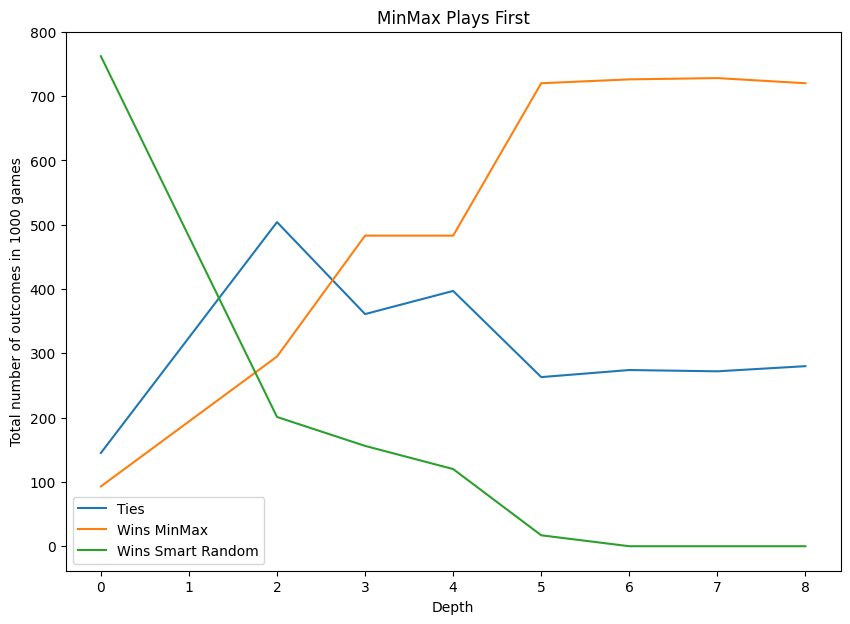

In [80]:



plt.figure(figsize=(10, 7),dpi=100)

iters = [8,7,6,5,4,3,2,0]

plt.plot(iters,all_depth_data_ties_c,label = 'Ties')
plt.plot(iters,all_depth_data_wins_minmax_c,label = 'Wins MinMax')
plt.plot(iters,all_depth_data_wins_smart_c,label = 'Wins Smart Random')



plt.title("MinMax Plays First")
plt.xlabel('Depth')
plt.ylabel('Total number of outcomes in 1000 games') 
plt.legend()
plt.show()

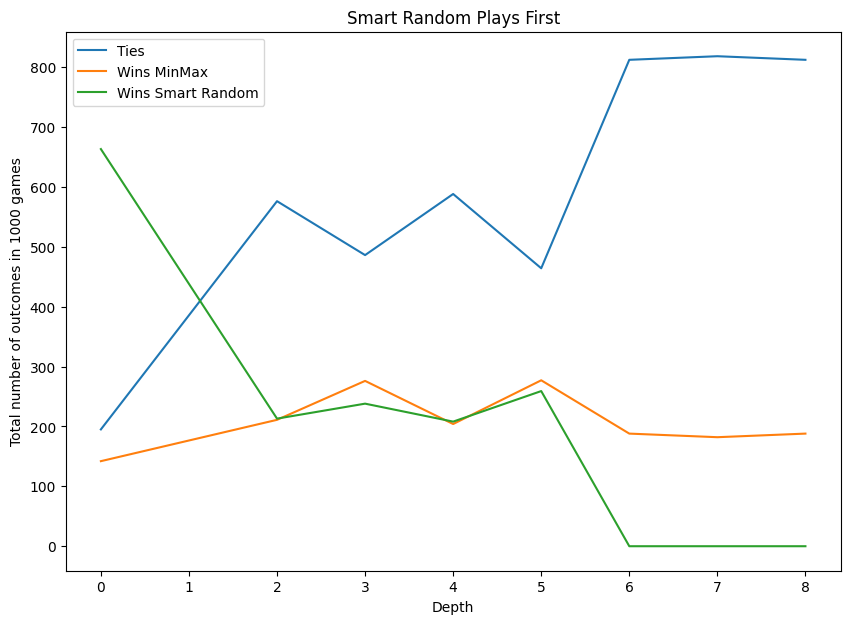

In [81]:
plt.figure(figsize=(10, 7),dpi=100)

iters = [8,7,6,5,4,3,2,0]

plt.plot(iters,all_depth_data_ties_s,label = 'Ties')
plt.plot(iters,all_depth_data_wins_minmax_s,label = 'Wins MinMax')
plt.plot(iters,all_depth_data_wins_smart_s,label = 'Wins Smart Random')


plt.title("Smart Random Plays First")
plt.xlabel('Depth')
plt.ylabel('Total number of outcomes in 1000 games') 
plt.legend()
plt.show()